In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


1.8.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [68]:
train_images[0].shape

(28, 28)

In [60]:
[10**i/1000 for i in range(3)]

[0.001, 0.01, 0.1]

la=0.001


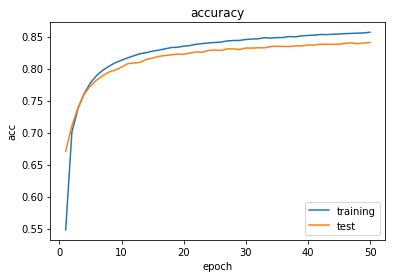

CPU times: user 3min 29s, sys: 20.8 s, total: 3min 50s
Wall time: 2min 37s


In [78]:
%%time
#la=0.01
#le=[10**i/1000 for i in range(3)]
le=[0.001,0.01]
le=[0.001]
ep=50
b=64
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    #keras.layers.Dropout(0.5),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

for la in le:
    print("la={}".format(la))
    sgd = keras.optimizers.SGD(lr=la)
    adam=keras.optimizers.Adam(lr=la)
    model.compile(optimizer=sgd,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    result=model.fit(train_images, train_labels,epochs=ep ,validation_data=(test_images, test_labels),verbose=0)
    
    plt.plot(range(1, ep+1), result.history['acc'], label="training")
    plt.plot(range(1, ep+1), result.history['val_acc'], label="test")
    plt.title("accuracy")
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.legend(loc='lower right')
    plt.savefig('sgd_{0}_3.png'.format(la))
    plt.show()

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
predictions = model.predict(test_images)


10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.8898


In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


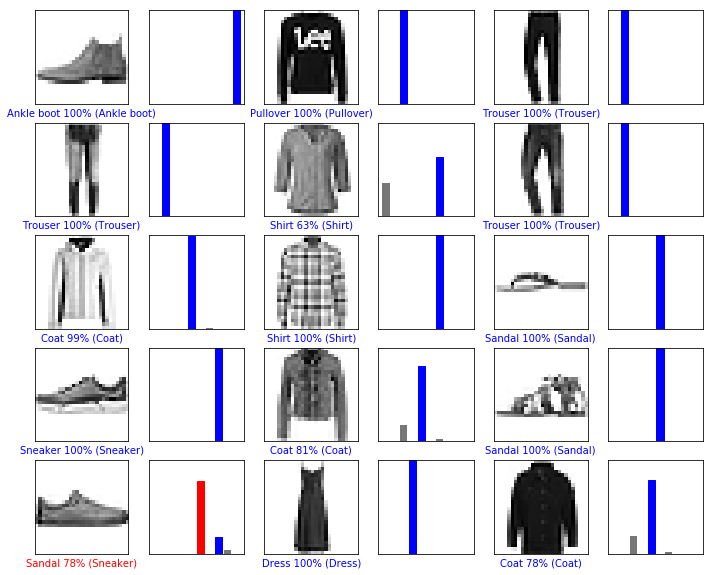

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
